In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data_OnlineRetail.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## First Recency

In [60]:
#Dataset InvoiceDate column Default Datatype "Object"
#So we need to convert InvoiceDate datatype "object" to "Datetime" Datatype

currentDate=pd.to_datetime("2012-01-01")
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

Findout Customer Last activity data

In [12]:
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [14]:
maxdate['InvoiceAge'] = (currentDate - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


In [16]:
#Final Recenccy

recency = maxdate.drop('InvoiceDate', axis=1)
recency

,InvoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


## Now, Frequency 

In [35]:
freq=df.drop_duplicates(subset="InvoiceNo").groupby(["CustomerID"])[["InvoiceNo"]].count()
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


## Now, Monetary

In [36]:
#monetary
df["total"]=df["Quantity"]*df["UnitPrice"]

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [38]:
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [39]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [40]:
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,InvoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [41]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


### Complete Data preprocessing

## Now Apply K-Mean

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

In [43]:
scaled

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [44]:
scaled.shape

(4372, 3)

In [45]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

c:\Users\PC\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [46]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [47]:
RFM["Clusters"]=(kmeans.labels_+1)

In [48]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12350.0,332,1,334.40,1
...,...,...,...,...
18280.0,299,1,180.60,1
18281.0,202,1,80.82,1
18282.0,29,3,176.60,2


In [49]:
RFM.Clusters.unique()

array([1, 2, 3])

In [50]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,1
12350.0,332,1,334.40,1
12353.0,226,1,89.00,1
12354.0,254,1,1079.40,1
12355.0,236,1,459.40,1
...,...,...,...,...
18260.0,194,8,2595.00,1
18262.0,162,1,149.48,1
18269.0,380,2,138.90,1


In [51]:
RFM[RFM.Clusters==2]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347.0,24,7,4310.00,2
12348.0,97,4,1797.24,2
12349.0,40,1,1757.55,2
12352.0,58,11,1545.41,2
12356.0,44,3,2811.43,2
...,...,...,...,...
18277.0,80,2,97.63,2
18278.0,95,1,173.90,2
18282.0,29,3,176.60,2


In [52]:
RFM[RFM.Clusters==3]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12415.0,46,26,123725.45,3
12748.0,22,224,29072.10,3
12971.0,25,89,10930.26,3
13089.0,24,118,57385.88,3
13408.0,23,81,27487.41,3
13694.0,25,60,62653.10,3
13798.0,23,63,36351.42,3
14096.0,26,34,57120.91,3
14156.0,31,66,113384.14,3


In [53]:
final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()
final

C:\Users\PC\AppData\Local\Temp\ipykernel_10512\4293404447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final=RFM.groupby("Clusters")["Recency","Frequency","Monetary"].mean()


,Recency,Frequency,Monetary
Clusters,,,
1,267.719964,1.852755,460.644066
2,61.560148,5.595620,1822.303551
3,27.521739,86.869565,81835.857391


In [54]:
def func(row):
    if row["Clusters"]==3:
        return 'Dimond'
    elif row["Clusters"]==1:
        return 'Gold'
    else:
        return 'Siver'

In [55]:
RFM['group']=RFM.apply(func, axis=1)

In [56]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,1,Gold
12347.0,24,7,4310.00,2,Siver
12348.0,97,4,1797.24,2,Siver
12349.0,40,1,1757.55,2,Siver
12350.0,332,1,334.40,1,Gold
...,...,...,...,...,...
18280.0,299,1,180.60,1,Gold
18281.0,202,1,80.82,1,Gold
18282.0,29,3,176.60,2,Siver


In [57]:
result=RFM.group.value_counts()

In [39]:
result

Gold      3239
Siver     1107
Dimond      26
Name: group, dtype: int64

<Axes: >

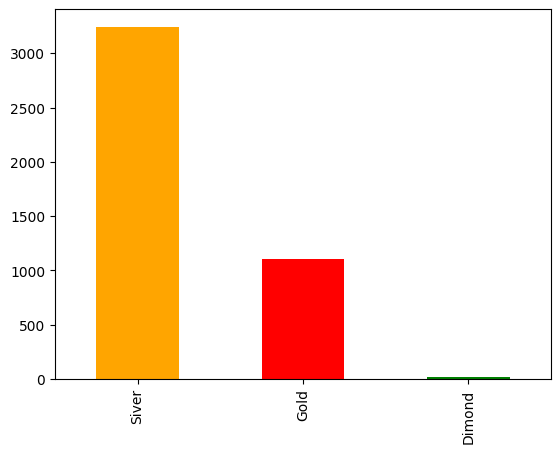

In [59]:
result.plot(kind="bar", color=["Orange","Red","Green"])